Neural Network Autoencoder
=======

Libraries

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_recall_fscore_support

__Read Data:__

In [2]:
data = pd.read_csv("/media/juanan/DATA/loan_data_analysis/data/loans_processed_autoencoder.csv", sep = "^")\
                   .sample(100000)

In [3]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
122303,13316908,21000.0,21000.0,20900.0,36 months,10.15,679.10,B,B2,coordinating manager,...,0.0,100.0,50.0,0.0,0.0,268509.0,46138.0,56400.0,15149.0,Cash
701039,84131441,6000.0,6000.0,6000.0,36 months,11.49,197.83,B,B5,Grocery manager,...,3.0,100.0,0.0,0.0,0.0,64585.0,35288.0,17000.0,43085.0,Cash
413273,44036977,8000.0,8000.0,8000.0,36 months,13.33,270.83,C,C3,Technical Marketing Engineer,...,2.0,100.0,100.0,0.0,0.0,62829.0,50348.0,11300.0,38929.0,Cash
440126,40463261,7000.0,7000.0,7000.0,36 months,14.31,240.30,C,C4,Manager,...,5.0,92.3,50.0,0.0,0.0,65968.0,35502.0,12300.0,39379.0,Cash
68899,26200348,18550.0,18550.0,18550.0,60 months,20.20,493.53,E,E3,owner,...,1.0,100.0,0.0,0.0,0.0,57507.0,48497.0,7700.0,47907.0,Cash


In [4]:
data.shape

(100000, 75)

__Pre-processing__:

Normalization:

In [5]:
numeric_variables = data.loc[:,data.columns != "loan_status"]._get_numeric_data().columns

In [6]:
numeric_variables

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptc

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(data[numeric_variables])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
data[numeric_variables] = scaler.transform(data[numeric_variables])

In [10]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
122303,-0.798233,0.782131,0.784392,0.776201,36 months,-0.726448,0.944143,B,B2,coordinating manager,...,-0.874748,0.514335,0.147362,-0.281506,-0.117142,0.643915,0.005431,1.770728,-0.538260,Cash
701039,1.481167,-0.979255,-0.978504,-0.974176,36 months,-0.436773,-0.936031,B,B5,Grocery manager,...,0.000641,0.514335,-1.251318,-0.281506,-0.117142,-0.544371,-0.231962,-0.127810,0.131355,Cash
413273,0.190594,-0.744403,-0.743451,-0.739226,36 months,-0.039011,-0.650842,C,C3,Technical Marketing Engineer,...,-0.291155,0.514335,1.546041,-0.281506,-0.117142,-0.554604,0.097543,-0.402472,0.031737,Cash
440126,0.075562,-0.861829,-0.860978,-0.856701,36 months,0.172840,-0.770114,C,C4,Manager,...,0.584233,0.197601,0.147362,-0.281506,-0.117142,-0.536312,-0.227279,-0.354286,0.042523,Cash
68899,-0.383537,0.494438,0.496452,0.500135,60 months,1.446111,0.219178,E,E3,owner,...,-0.582952,0.514335,-1.251318,-0.281506,-0.117142,-0.585616,0.057044,-0.575942,0.246936,Cash


Categorical Variables:

In [11]:
categorical_variables = data.select_dtypes(include="object").columns

In [12]:
def categorical_to_numeric(variable):
    
    variable_dict = dict(data.groupby(variable)['loan_status'].mean())
    
    result = data[variable].map(lambda i: variable_dict[i])
    
    return result

In [13]:
for variable in categorical_variables:
    data[variable] = categorical_to_numeric(variable)

In [14]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
122303,-0.798233,0.782131,0.784392,0.776201,0.166537,-0.726448,0.944143,0.136496,0.117078,0.500000,...,-0.874748,0.514335,0.147362,-0.281506,-0.117142,0.643915,0.005431,1.770728,-0.538260,0.207236
701039,1.481167,-0.979255,-0.978504,-0.974176,0.166537,-0.436773,-0.936031,0.136496,0.171806,0.000000,...,0.000641,0.514335,-1.251318,-0.281506,-0.117142,-0.544371,-0.231962,-0.127810,0.131355,0.207236
413273,0.190594,-0.744403,-0.743451,-0.739226,0.166537,-0.039011,-0.650842,0.225039,0.226547,0.000000,...,-0.291155,0.514335,1.546041,-0.281506,-0.117142,-0.554604,0.097543,-0.402472,0.031737,0.207236
440126,0.075562,-0.861829,-0.860978,-0.856701,0.166537,0.172840,-0.770114,0.225039,0.258647,0.235913,...,0.584233,0.197601,0.147362,-0.281506,-0.117142,-0.536312,-0.227279,-0.354286,0.042523,0.207236
68899,-0.383537,0.494438,0.496452,0.500135,0.335949,1.446111,0.219178,0.390884,0.397040,0.297398,...,-0.582952,0.514335,-1.251318,-0.281506,-0.117142,-0.585616,0.057044,-0.575942,0.246936,0.207236


In [15]:
data.shape

(100000, 75)

Target:

In [16]:
X = data.loc[:, data.columns!='loan_status']

In [17]:
y = data['loan_status']

____________________

__Neural Network Autoencoder__: 
====
_____________________

Parameters:

In [18]:
learning_rate = 0.0001
epochs = 2000
batch_size = 28

Data Transformation:

In [19]:
X_split = X.values

num_batches = int(X_split.shape[0] / batch_size)
X_split = np.array_split(X_split, num_batches)

__Neural Network Architecture__:

In [20]:
# hidden layers
_, number_of_variables = np.shape(X_split[0])
num_hidden_0 = number_of_variables
num_hidden_1 = 24
num_hidden_2 = 12

#with tf.device('/cpu:0'):
x = tf.placeholder(dtype = tf.float64, shape = [None, num_hidden_0])

weights = {
    # encoder
    'w1': tf.Variable(tf.truncated_normal(stddev=.1, shape=[num_hidden_0, num_hidden_1], dtype=tf.float64)),
    'w2': tf.Variable(tf.truncated_normal(stddev=.1, shape=[num_hidden_1, num_hidden_2], dtype=tf.float64)),
    # decoder
    'w3': tf.Variable(tf.truncated_normal(stddev=.1, shape=[num_hidden_2, num_hidden_1], dtype=tf.float64)),
    'w4': tf.Variable(tf.truncated_normal(stddev=.1, shape=[num_hidden_1, num_hidden_0], dtype=tf.float64)),
}

biases = {
    # encoder
    'b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'b2': tf.Variable(tf.random_normal([num_hidden_2], dtype=tf.float64)),
    # decoder
    'b3': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'b4': tf.Variable(tf.random_normal([num_hidden_0], dtype=tf.float64)),
}

#with tf.device('/gpu:0'):
hidden_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['w1']), biases['b1']))
hidden_2 = tf.nn.sigmoid(tf.add(tf.matmul(hidden_1, weights['w2']), biases['b2']))
hidden_3 = tf.nn.sigmoid(tf.add(tf.matmul(hidden_2, weights['w3']), biases['b3']))
logits = tf.add(tf.matmul(hidden_3, weights['w4']), biases['b4'])

predictions = tf.nn.sigmoid(logits)

Loss Function:

In [21]:
loss = tf.reduce_mean(tf.pow(x - predictions, 2))

Optimizer:

In [22]:
optimize = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

TensorFlow Session:

In [23]:
start_time = time.time()
init = tf.global_variables_initializer()
losses = []

with tf.Session() as session:
    
    session.run(init)
    
    for epoch in range(epochs):
        avg_cost = 0
    
        for x_batch in X_split:
        
            _, eval_loss = session.run([optimize, loss],
                                       feed_dict={x: x_batch})
            
        avg_cost += eval_loss
    
        avg_cost /= num_batches
            
        losses.append(avg_cost)
        
        if epoch % 25 == 0: 
            print("epoch: {}".format(epoch))
            print("loss: {}".format(avg_cost))
    
    # Encoded Input
    X_encoded = session.run([hidden_2], feed_dict = {x: X})

final_time = time.time()

epoch: 0
loss: 0.00028540040437568143
epoch: 25
loss: 0.00023659184597097223
epoch: 50
loss: 0.00022789004549579242
epoch: 75
loss: 0.0002229961982767804
epoch: 100
loss: 0.00021977302216577593
epoch: 125
loss: 0.00021795340517184294
epoch: 150
loss: 0.00021586489225463977
epoch: 175
loss: 0.0002150291388256096
epoch: 200
loss: 0.00021467718986157517
epoch: 225
loss: 0.0002144374478864326
epoch: 250
loss: 0.00021380266005582537
epoch: 275
loss: 0.00021323697382586758
epoch: 300
loss: 0.00021303688808631293
epoch: 325
loss: 0.00021301076846073926
epoch: 350
loss: 0.0002130443071575258
epoch: 375
loss: 0.00021310850421535102
epoch: 400
loss: 0.0002131424241764091
epoch: 425
loss: 0.00021316339778320407
epoch: 450
loss: 0.00021315631373657187
epoch: 475
loss: 0.00021315763201864088
epoch: 500
loss: 0.00021316598526812812
epoch: 525
loss: 0.00021316475830749122
epoch: 550
loss: 0.00021314342675248196
epoch: 575
loss: 0.00021313302356539308
epoch: 600
loss: 0.00021311639361434558
epoch: 625

In [24]:
print("Training Time: {} minutes".format((final_time - start_time)/60))

Training Time: 77.7399428288142 minutes


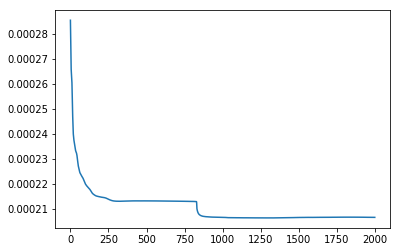

In [25]:
plt.plot(losses)
plt.show()

________________________________

Logistic Regression:
=========
__________________

Looking at the new data:

In [26]:
y = y.reset_index()['loan_status']
x_encoded = pd.DataFrame(X_encoded[0])

In [27]:
encoded_data = pd.concat([x_encoded, y], axis = 1)

In [28]:
encoded_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,loan_status
0,0.611901,0.582242,0.621473,0.614137,0.472164,0.545853,0.599605,0.809026,0.615611,0.290739,0.423355,0.654608,1.0
1,0.557777,0.363330,0.363782,0.523537,0.510751,0.581406,0.416169,0.431738,0.497761,0.191100,0.578677,0.347637,0.0
2,0.583186,0.626738,0.439008,0.553997,0.580008,0.500157,0.598009,0.468112,0.434333,0.321809,0.573768,0.542138,0.0
3,0.539869,0.441389,0.452584,0.514628,0.375269,0.385080,0.355902,0.662844,0.638761,0.570143,0.687646,0.556490,0.0
4,0.482832,0.439521,0.356054,0.575607,0.406367,0.488741,0.384507,0.209237,0.512228,0.187301,0.473476,0.565615,1.0


In [29]:
encoded_data.shape

(100000, 13)

In [30]:
encoded_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,loan_status
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.536790,0.543530,0.456661,0.528815,0.522987,0.489380,0.487230,0.497868,0.518176,0.355592,0.520320,0.530457,0.207560
std,0.131107,0.088838,0.091866,0.097281,0.111469,0.086204,0.102331,0.101938,0.093483,0.130791,0.085984,0.109386,0.405562
min,0.076106,0.146447,0.125855,0.128365,0.067365,0.145879,0.083514,0.174126,0.186848,0.057056,0.171246,0.066403,0.000000
25%,0.497621,0.485700,0.396494,0.462240,0.446429,0.431124,0.418705,0.441322,0.453645,0.278872,0.463917,0.475100,0.000000
50%,0.567466,0.554055,0.456597,0.525303,0.531158,0.488160,0.489741,0.494631,0.514463,0.348617,0.524279,0.539831,0.000000
75%,0.621682,0.609499,0.514211,0.590968,0.603292,0.545602,0.555778,0.560538,0.580401,0.432148,0.579351,0.602594,0.000000
max,0.873040,0.771285,0.835782,0.866994,0.855518,0.889210,0.912850,0.885648,0.901537,0.861067,0.842228,0.874528,1.000000


Save encoded data in output folder:

In [182]:
encoded_data.to_csv("../output/encoded_data_sample_100000.csv", sep = "^", index = False)

Train/Test split:

In [176]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.8)

Model:

In [177]:
logistic_regression = LogisticRegression()

In [178]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Evaluation:

In [179]:
# scores
y_scores_train = pd.DataFrame(logistic_regression.predict_proba(X_train)).loc[:,1]
y_scores_test = pd.DataFrame(logistic_regression.predict_proba(X_test)).loc[:,1]

In [180]:
# auc
auc_train = roc_auc_score(y_train, y_scores_train)
auc_test = roc_auc_score(y_test, y_scores_test)

In [181]:
print("AUC:")
print("AUC in the train set: {}".format(auc_train))
print("AUC in the test set: {}".format(auc_test))
print("------------------------")    

AUC:
AUC in the train set: 0.7096491625262911
AUC in the test set: 0.7170508671181766
------------------------


In [110]:
# confusion matrix and accuracy
y_test_pred = logistic_regression.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Accuracy: {}".format(accuracy_score(y_test, y_test_pred)))
print("Recall: {}".format(precision_recall_fscore_support(y_test, y_test_pred)[0]))
print("Precision: {}".format(precision_recall_fscore_support(y_test, y_test_pred)[1]))
print("------------------------")

Confusion Matrix:
[[7709  153]
 [1954  184]]
Accuracy: 0.7893
Recall: [0.79778537 0.54599407]
Precision: [0.9805393  0.08606174]
------------------------


_______________

XGBoost 
=======
_________________

In [184]:
import xgboost as xgb

Train/Test split:

In [334]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.66)

In [335]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

Model:

In [352]:
xg_boost = xgb.XGBClassifier(n_estimators = 900, max_depth = 2, colsample_bytree = 0.4, 
                             subsample=0.8, learning_rate = 0.1)

In [353]:
xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

Evaluation:

In [354]:
# scores
y_scores_train = pd.DataFrame(xg_boost.predict_proba(X_train)).loc[:,1]
y_scores_test = pd.DataFrame(xg_boost.predict_proba(X_test)).loc[:,1]

In [355]:
# auc
auc_train = roc_auc_score(y_train, y_scores_train)
auc_test = roc_auc_score(y_test, y_scores_test)

In [356]:
print("AUC:")
print("AUC in the train set: {}".format(auc_train))
print("AUC in the test set: {}".format(auc_test))
print("------------------------")    

AUC:
AUC in the train set: 0.7477937165407706
AUC in the test set: 0.7200962034123441
------------------------


In [341]:
# confusion matrix and accuracy
y_test_pred = xg_boost.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Accuracy: {}".format(accuracy_score(y_test, y_test_pred)))
print("Recall: {}".format(precision_recall_fscore_support(y_test, y_test_pred)[0]))
print("Precision: {}".format(precision_recall_fscore_support(y_test, y_test_pred)[1]))
print("------------------------")

Confusion Matrix:
[[15381   443]
 [ 3675   501]]
Accuracy: 0.7941
Recall: [0.80714736 0.53072034]
Precision: [0.97200455 0.11997126]
------------------------


/home/juanan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
